In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data

m_drug_data=r'/home/shoujun/Desktop/bootcamp/GW-Bootcamp/Homework#5_Matplotlib/mouse_drug_data.csv'
cli_data=r'/home/shoujun/Desktop/bootcamp/GW-Bootcamp/Homework#5_Matplotlib/clinicaltrial_data.csv'

drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

df_mouse=pd.read_csv(m_drug_data)
df_mouse=df_mouse.loc[df_mouse['Drug'].isin(drug_list),:].drop_duplicates()
df_cli=pd.read_csv(cli_data).drop_duplicates()
df=df_mouse.merge(df_cli)

df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,q119,Ketapril,0,45.000000,0
1,q119,Ketapril,5,47.864440,0
2,q119,Ketapril,10,51.236606,0
3,n923,Ketapril,0,45.000000,0
4,n923,Ketapril,5,45.824881,0


In [3]:
# Set plot

plt.style.use('seaborn')
fig, ax=plt.subplots(2,2)
mark_list=['--ob','--*r','--sg','-->k']

In [4]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment

df_vol=df[['Timepoint','Drug','Tumor Volume (mm3)' ]].copy()
df_vol_avg=df_vol.pivot_table('Tumor Volume (mm3)', 'Timepoint','Drug')
df_vol_std=df_vol.pivot_table('Tumor Volume (mm3)', 'Timepoint', 'Drug',
                              aggfunc='std')

for i in range(4):
    ax[0,0].errorbar(df_vol_avg.index, df_vol_avg.loc[:,drug_list[i]],
                     yerr=df_vol_std.loc[:,drug_list[i]],fmt=mark_list[i],
                     label=drug_list[i])

ax[0,0].set_xbound(lower=0, upper=50)
ax[0,0].set_ybound(lower=20,upper=80)
ax[0,0].set_title('Tumor Response to Treatment')
ax[0,0].set_xlabel('Time (Days)')
ax[0,0].set_ylabel('Average Tumor Volume (mm3)')
ax[0,0].set_xticks(range(0,50,5))
ax[0,0].legend(fontsize='x-small', loc='upper left')

In [5]:
# Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes 
# over time for each treatment.

df_meta=df[['Timepoint','Drug','Metastatic Sites']].copy()
df_meta_avg=df_meta.pivot_table('Metastatic Sites', 'Timepoint','Drug')
df_meta_std=df_meta.pivot_table('Metastatic Sites', 'Timepoint', 'Drug',
                              aggfunc='std')
  
for i in range(4):
    ax[0,1].errorbar(df_meta_avg.index, df_meta_avg.loc[:,drug_list[i]],
                     yerr=df_meta_std.loc[:,drug_list[i]],fmt=mark_list[i],
                     label=drug_list[i])

ax[0,1].set_xbound(lower=0, upper=50)
ax[0,1].set_ybound(lower=0.0,upper=4.5)
ax[0,1].set_title('Metastatic Spread During Treatment')
ax[0,1].set_xlabel('Treatment Duration (Days)')
ax[0,1].set_ylabel('Met. Sites')
ax[0,1].set_xticks(range(0,50,5))
ax[0,1].set_yticks(np.arange(0,5,0.5))
ax[0,1].legend(fontsize='x-small', loc='upper left')

In [6]:
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

df_surv=df[['Timepoint','Drug','Mouse ID']].copy()
df_surv_count=df_surv.pivot_table('Mouse ID', 'Timepoint','Drug', aggfunc='count')
df_surv_perc=df_surv_count/df_surv_count.iloc[0,:]*100

for i in range(4):
    ax[1,0].plot(df_surv_perc.index, df_surv_perc.loc[:,drug_list[i]],
                mark_list[i],label=drug_list[i])

ax[1,0].set_xbound(lower=0, upper=50)
ax[1,0].set_ybound(lower=20,upper=100)
ax[1,0].set_title('Survival During Treatment')
ax[1,0].set_xlabel('Time (Days)')
ax[1,0].set_ylabel('Survival Rate (%)')
ax[1,0].set_xticks(range(0,50,5))
ax[1,0].legend(fontsize='x-small', loc='lower left')

In [7]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

df_volc=df[['Timepoint','Drug','Tumor Volume (mm3)' ]].copy()
df_volc_avg=df_volc.pivot_table('Tumor Volume (mm3)', 'Timepoint','Drug')
df_volc_change=(df_volc_avg.iloc[-1,:]/df_volc_avg.iloc[0,:]-1)*100

xtick=np.arange(len(df_volc_change.index))
barlist=ax[1,1].bar(xtick, df_volc_change)

for i in range(4):
    if df_volc_change[i]<0:
        barlist[i].set_color('g')
    else:
        barlist[i].set_color('r')

ax[1,1].set_title('Tumor Change Over 45 Day Treatment')
ax[1,1].set_ylabel('% Tumor Volume Change')
ax[1,1].set_xticklabels(['_']+list(df_volc_change.index))

ax[1,1].text(0, -6, str(df_volc_change[drug_list[0]].round(2)), ha='center', color='white')
for i in range(1,4):
    ax[1,1].text(i, 3, str(df_volc_change[drug_list[i]].round(2)), ha='center',color='white')

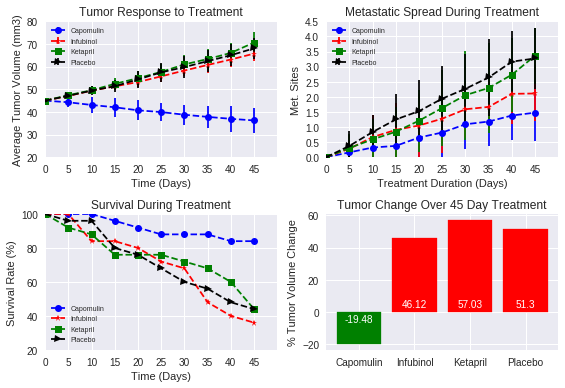

In [8]:
# Show plot

plt.tight_layout()
plt.show()